In [1]:
import torchvision.models as models
googlenet = models.googlenet(pretrained=True)


/Users/wuyuxian/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/wuyuxian/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
import torch
import torchvision.models as models

# 加载预训练模型
googlenet = models.googlenet(pretrained=True)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print('fc_in_features:',fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print('fc_out_features:',fc_out_features)

# 修改预训练模型的输出分类数
googlenet.fc = torch.nn.Linear(fc_in_features,10)


fc_in_features: 1024
fc_out_features: 1000


/Users/wuyuxian/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/wuyuxian/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# make_grid 的作用是将若干幅图像拼成在一个网格中
`torchvision.utils.make_grid(tensor, nrow=8, padding=2)`

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)

# 取32张图片
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor ,label_tensor = data_iter.__next__()
print(img_tensor.shape)

torch.Size([32, 1, 28, 28])


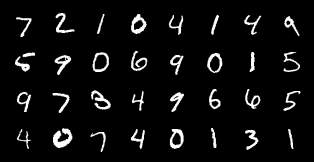

In [6]:
grid_tensor = torchvision.utils.make_grid(img_tensor,nrow=8,padding=10)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [7]:
torchvision.utils.save_image(grid_tensor,'grid.jpg')

In [8]:
torchvision.utils.save_image(img_tensor, 'grid2.jpg', nrow=5, padding=2)